In [199]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
import os
import pandas as pd

%matplotlib inline

In [200]:
directory = './2018dat/'
arr = os.listdir(directory)
arr.sort()
N = len(arr)
TEC = []
for i in range(N):
    FName = directory + arr[i]
    data = pd.read_table(FName, header = None, sep = '\s+')
    TEC.append(data)

In [201]:
NP_TEC = np.dstack(TEC)

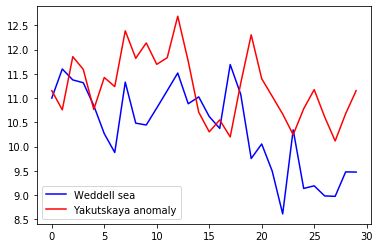

In [202]:
Wed_sea = NP_TEC[61, 54, 0:30]
Yak_an = NP_TEC[24, 30, 0:30]

plt.plot(Wed_sea, 'b', label = 'Weddell sea')
plt.plot(Yak_an, 'r', label ='Yakutskaya anomaly')
plt.legend()

In [203]:
# детрендинг методом скользящего среднего. degree - окно усреднения
def detrendS(data,degree=10):
    detrended=[0.]*degree # заполняем нулями
    for i in range(degree,len(data)-degree):
        chunk=data[i-degree:i+degree]
        chunk=sum(chunk)/len(chunk)
        detrended.append(data[i]-chunk)
    return detrended+[0.]*degree

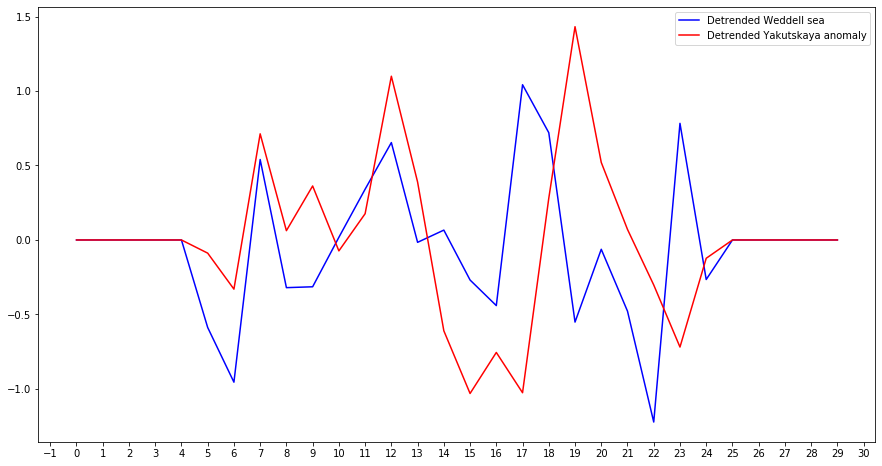

In [204]:
Det_Wed_sea = np.asarray(detrendS(Wed_sea,5))
Det_Yak_an =  np.asarray(detrendS(Yak_an,5))


fig,ax=plt.subplots(figsize=(15,8))
plt.plot(Det_Wed_sea, 'b', label = 'Detrended Weddell sea')
plt.plot(Det_Yak_an, 'r', label ='Detrended Yakutskaya anomaly')
ax.xaxis.set_major_locator(MultipleLocator(1))
plt.legend()

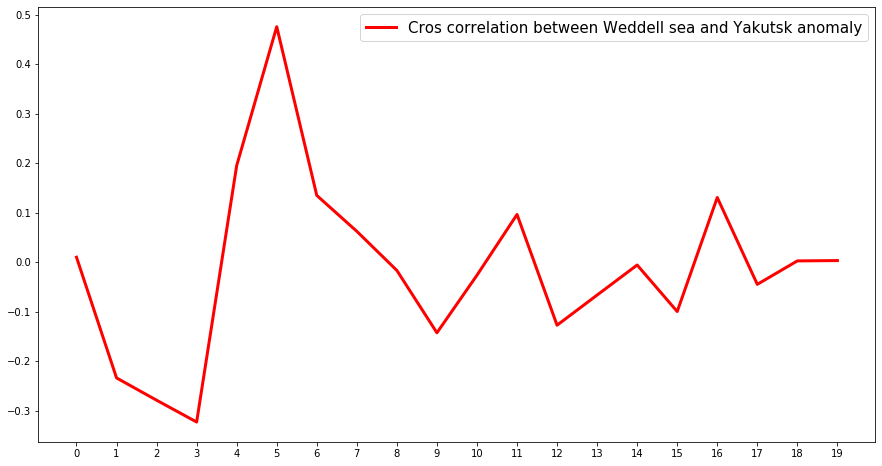

In [205]:
# нормирующий член
norma = 0.5 *(np.sum(Det_Wed_sea[5:25]**2) + np.sum(Det_Yak_an[5:25]**2))
# корреляционная функция
cros_cor = np.correlate(Det_Wed_sea[5:25], Det_Yak_an[5:25], 'full')/norma
# используем только 2ю половину
cros_cor = cros_cor[int(len(cros_cor)/2):]

fig,ax=plt.subplots(figsize=(15,8))
ax.plot(cros_cor, 'r', linewidth = 3, label = 'Cros correlation between Weddell sea and Yakutsk anomaly')


ax.tick_params(labelsize=10)
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.legend(fontsize = 15)
#plt.savefig('Cross_cor.png')

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([ 0.00954099,  0.18774318,  0.18865547,  0.06646713, -0.17471269,
        -0.16681225, -0.22532374, -0.21211564,  0.2520876 ,  0.35076704,
         0.00996062, -0.23496545, -0.2801872 , -0.32446209,  0.19589218,
         0.47764988,  0.13530153,  0.06245024, -0.01692195, -0.14339417,
        -0.02657283]),
 <matplotlib.lines.Line2D at 0x29d2f6442c8>)

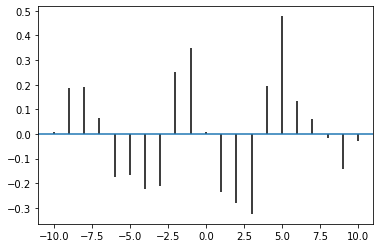

In [206]:
matplotlib.pyplot.xcorr(Det_Wed_sea, Det_Yak_an, usevlines = True)

In [207]:
Corr_coef = np.corrcoef(Det_Wed_sea, Det_Yak_an )

In [208]:
Corr_coef

array([[1.        , 0.01029024],
       [0.01029024, 1.        ]])

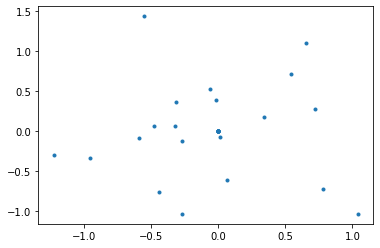

In [209]:
plt.plot(Det_Wed_sea, Det_Yak_an, '.')

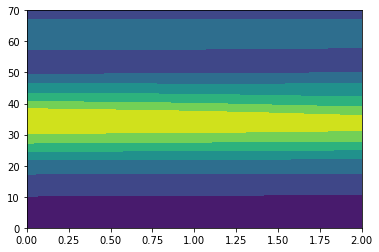

In [210]:
plt.contourf(NP_TEC[:,60:63,55])

In [211]:
# автокорреляционная функция
def autocorr(y,r):
    n=len(y)
    
    y1=np.zeros(n)
    
    for i in range(n):
        
        y1[0:i]=0           #обнуление i-1 го элемента последовательности y
        y1[i:n]=y[:n-i]  #заполнение i го элемента последовательностью y (сдвиг на i)
        r[i]=np.corrcoef(y1,y)[1,0]    #вычисление коэффициентов корреляции
        #plt.plot(y1)

    del y1
    return()

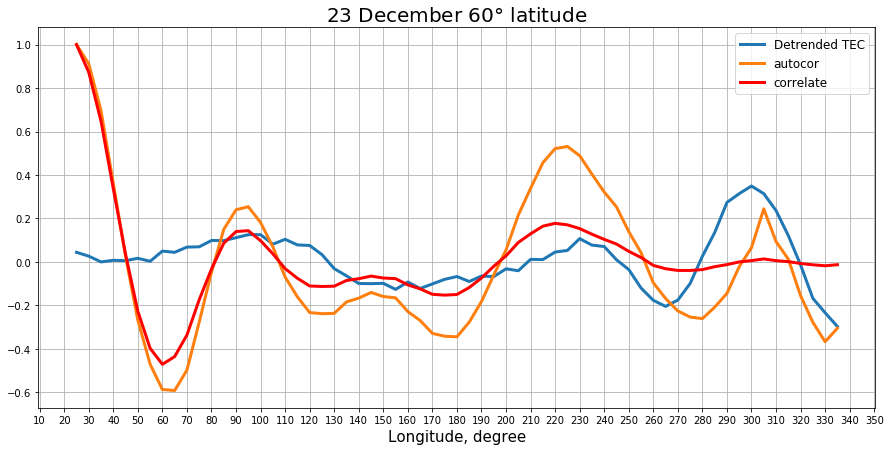

In [223]:
TEC_70dg_lat = NP_TEC[59,:,54]
Det_TEC_70dg_lat = np.asarray(detrendS(TEC_70dg_lat,5))
X = range(0, 365, 5)
r=np.zeros(len(Det_TEC_70dg_lat[5:-5]))
autocorr(Det_TEC_70dg_lat[5:-5],r)
# нормирующий член
norma = np.sum(Det_TEC_70dg_lat[5:-5]**2)
# корреляционная функция
cros_cor1 = np.correlate(Det_TEC_70dg_lat[5:-5], Det_TEC_70dg_lat[5:-5], 'full')/norma
# используем только 2ю половину
cros_cor1 = cros_cor1[int(len(cros_cor1)/2):]



fig, ax = plt.subplots(figsize=(15,7))

plt.plot(X[5:-5], Det_TEC_70dg_lat[5:-5], linewidth = 3, label = 'Detrended TEC')

plt.plot(X[5:-5], r, label='autocor', linewidth = 3)

plt.plot(X[5:-5], cros_cor1, 'r', linewidth = 3, label = 'correlate')

ax.grid()
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.set_xlabel('Longitude, degree', size = 15)
ax.set_title('23 December ' r'$60\degree$ latitude', size = 20)
# размер окна легенды prop = {'size': 12}
ax.legend(prop={'size': 12})
plt.savefig('23_december_60lat.png')